In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout

c:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [21]:
model = Sequential()

 input: 100x100 images with 3 channels -> (64, 64, 3) tensors.
 this applies 64 convolution filters of size 3x3 each.  output of layer is (62,62,64) for 64 filter type 

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.output_shape

(None, 62, 62, 32)

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.output_shape

(None, 31, 31, 32)

In [24]:
model.add(Dropout(0.25))

In [25]:
#-----convolution 2---#
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.output_shape

(None, 13, 13, 64)

#flatten model

In [26]:
model.add(Flatten())
model.output_shape

(None, 10816)

In [27]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [29]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Convolutional_Neural_Networks\\dataset\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Convolutional_Neural_Networks\\dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
model.fit_generator(
        training_set,
        steps_per_epoch=8000,
        epochs=25,
        validation_data=test_set,
        validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 1470s 184ms/step - loss: 0.4542 - acc: 0.7736 - val_loss: 0.4461 - val_acc: 0.8161
Epoch 2/25
8000/8000 [==============================] - 1015s 127ms/step - loss: 0.2474 - acc: 0.8953 - val_loss: 0.4962 - val_acc: 0.8211
Epoch 3/25
8000/8000 [==============================] - 1195s 149ms/step - loss: 0.1586 - acc: 0.9370 - val_loss: 0.5591 - val_acc: 0.8275
Epoch 4/25
8000/8000 [==============================] - 1971s 246ms/step - loss: 0.1157 - acc: 0.9560 - val_loss: 0.5687 - val_acc: 0.8251
Epoch 5/25
8000/8000 [==============================] - 1138s 142ms/step - loss: 0.0926 - acc: 0.9658 - val_loss: 0.6367 - val_acc: 0.8304
Epoch 6/25
8000/8000 [==============================] - 1002s 125ms/step - loss: 0.0784 - acc: 0.9712 - val_loss: 0.6265 - val_acc: 0.8362
Epoch 7/25
8000/8000 [==============================] - 1400s 175ms/step - loss: 0.0675 - acc: 0.9756 - val_loss: 0.6781 - val_acc: 0.8408
Epoch 8/25
8000/8000 [=====

KeyboardInterrupt: 

In [31]:
model.save_weights('image_class.h5')

In [34]:
import numpy as np
from keras.preprocessing import image


In [88]:
def result(r):
    if r[0][0]==1:
        print('DOG')
    else:
        print('CAT')

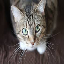

In [97]:
testImage1 = image.load_img('Convolutional_Neural_Networks\\test1.jpg',target_size=(64,64))
testImage1

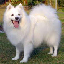

In [98]:
testImage2 = image.load_img('Convolutional_Neural_Networks\\test3.jpg',target_size=(64,64))
testImage2

In [99]:
image1_arr = image.img_to_array(testImage1)
image2_arr = image.img_to_array(testImage2)
image1_arr.shape

(64, 64, 3)

In [100]:
image1_arr=np.expand_dims(image1_arr,axis=0)
image2_arr=np.expand_dims(image2_arr,axis=0)
image1_arr.shape

(1, 64, 64, 3)

In [101]:
result1 = model.predict(image1_arr)
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [102]:
result1.shape

(1, 1)

In [103]:
result(result1)

CAT


In [104]:
result(model.predict(image2_arr))

DOG


VOLLA...!!!!